<a href="https://colab.research.google.com/github/marcinkielek/new-repo/blob/main/mlr_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

name, year, selling_price, km_driven, fuel, seller_type, transmission, Owner

there are 301 rows and 8 columns in this dataset

data from:
https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

idea for the project:
https://www.telusinternational.com/articles/10-open-datasets-for-linear-regression


In [21]:
#libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [22]:
#from google.colab import files
#uploaded = files.upload()

In [23]:
df1 = pd.read_csv(io.BytesIO(uploaded['car data.csv']))


df = pd.DataFrame(df1)

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


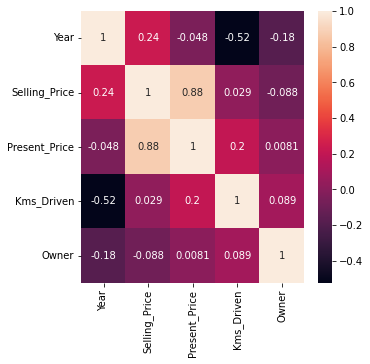

In [24]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [25]:
#for col in df1:
#    print(df1.Transmission.unique())

distinct values for Fuel_Type -> ['Petrol' 'Diesel' 'CNG']

distinct values for Seller_Type -> ['Dealer' 'Individual']

distinct values for Transmission -> ['Manual' 'Automatic']

## data cleaning

In [26]:
df1_1 = pd.get_dummies(df1["Fuel_Type"]) 

df1.Seller_Type[df1.Seller_Type == 'Dealer'] = 0
df1.Seller_Type[df1.Seller_Type == 'Individual'] = 1

df1.Transmission[df1.Transmission == 'Manual'] = 0
df1.Transmission[df1.Transmission == 'Automatic'] = 1
df1_2 = df1.drop(['Fuel_Type'], axis=1)
final = pd.concat((df1_1, df1_2), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [27]:
print(final)

     CNG  Diesel  Petrol Car_Name  ...  Kms_Driven  Seller_Type  Transmission  Owner
0      0       0       1     ritz  ...       27000            0             0      0
1      0       1       0      sx4  ...       43000            0             0      0
2      0       0       1     ciaz  ...        6900            0             0      0
3      0       0       1  wagon r  ...        5200            0             0      0
4      0       1       0    swift  ...       42450            0             0      0
..   ...     ...     ...      ...  ...         ...          ...           ...    ...
296    0       1       0     city  ...       33988            0             0      0
297    0       0       1     brio  ...       60000            0             0      0
298    0       0       1     city  ...       87934            0             0      0
299    0       1       0     city  ...        9000            0             0      0
300    0       0       1     brio  ...        5464            0  

In [28]:

x = final[['CNG','Diesel','Petrol','Year', 'Present_Price', 'Kms_Driven', 'Seller_Type', 'Transmission', 'Owner']]
y = final[['Selling_Price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)



In [29]:
lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)

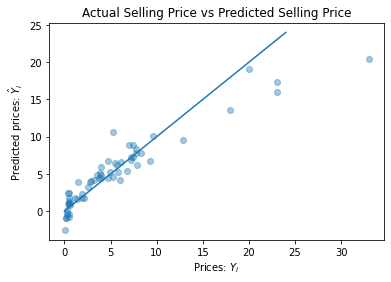

In [39]:
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.plot(range(25), range(25))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Selling Price vs Predicted Selling Price")

plt.show()


In [31]:
print("Train score:")
print(lm.score(x_train,y_train))

print("Test score:")
print(lm.score(x_test, y_test))



Train score:
0.8910301139953801
Test score:
0.847744554456958
